In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import sklearn
import statsmodels.api as sm

from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from pylab import rcParams

%matplotlib inline

plt.style.use('seaborn-whitegrid')

___

### __FIRST PART__

#### Load dataSet

In this session we are going to import the dataset with Pandas and we will see the main aspects of the dataset.

#### Description of table Columns:
- __Data__: the first time since the job contract started [day/month/year]
- __Genere__:sex of the worker [M: Male, F: Female]
- __Eta__: age of the worker [years]
- __Settore Economico Dettaglio__: business sector of the worker
- __Titolo Studio__: qualification of the worker
- __Contratto__: type of worker's contract
- __Provincia Impresa__: company headquarters
- __Italiano__: worker's nationality

In [2]:
## We will display DF head and tail
df_Rapporti_Attivati = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
df_Rapporti_Attivati

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
9579789,01/03/2020,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
9579790,06/09/2010,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA
9579791,06/11/2021,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL
9579792,02/02/2010,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,TEMPO PIENO,BERGAMO,SENEGAL


In [3]:
## We will see the number of rows and columns of the dataset
row = df_Rapporti_Attivati.shape[0]
column = df_Rapporti_Attivati.shape[1]
print(f'Rows: {row}')
print(f'Column: {column}')

Rows: 9579794
Column: 9


In [4]:
## We will see the values type of the columns
df_Rapporti_Attivati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


___

__General data view__

In this paragraph we will explore the dataset with a global analysis. It includes:
1. Description in a single column: We will display the different values (e.g. count, average age, values type...) associated with the 'ETA' column.
2. Histogram visualization of the different age groups distribution.
3. Distribution for gender.
4. Through a pie chart we will see the distribution of the different 'PROVINCIAIMPRESA'.
5. Finally, we will display the number of jobs by gender for each city.

1. __Description in a single column__

In [5]:
df_Rapporti_Attivati.ETA.describe().round(2)

count    9579794.00
mean          35.30
std           11.78
min            0.00
25%           25.00
50%           34.00
75%           44.00
max          221.00
Name: ETA, dtype: float64

2. __Dristribution of 'ETA'__

Text(0, 0.5, 'Density')

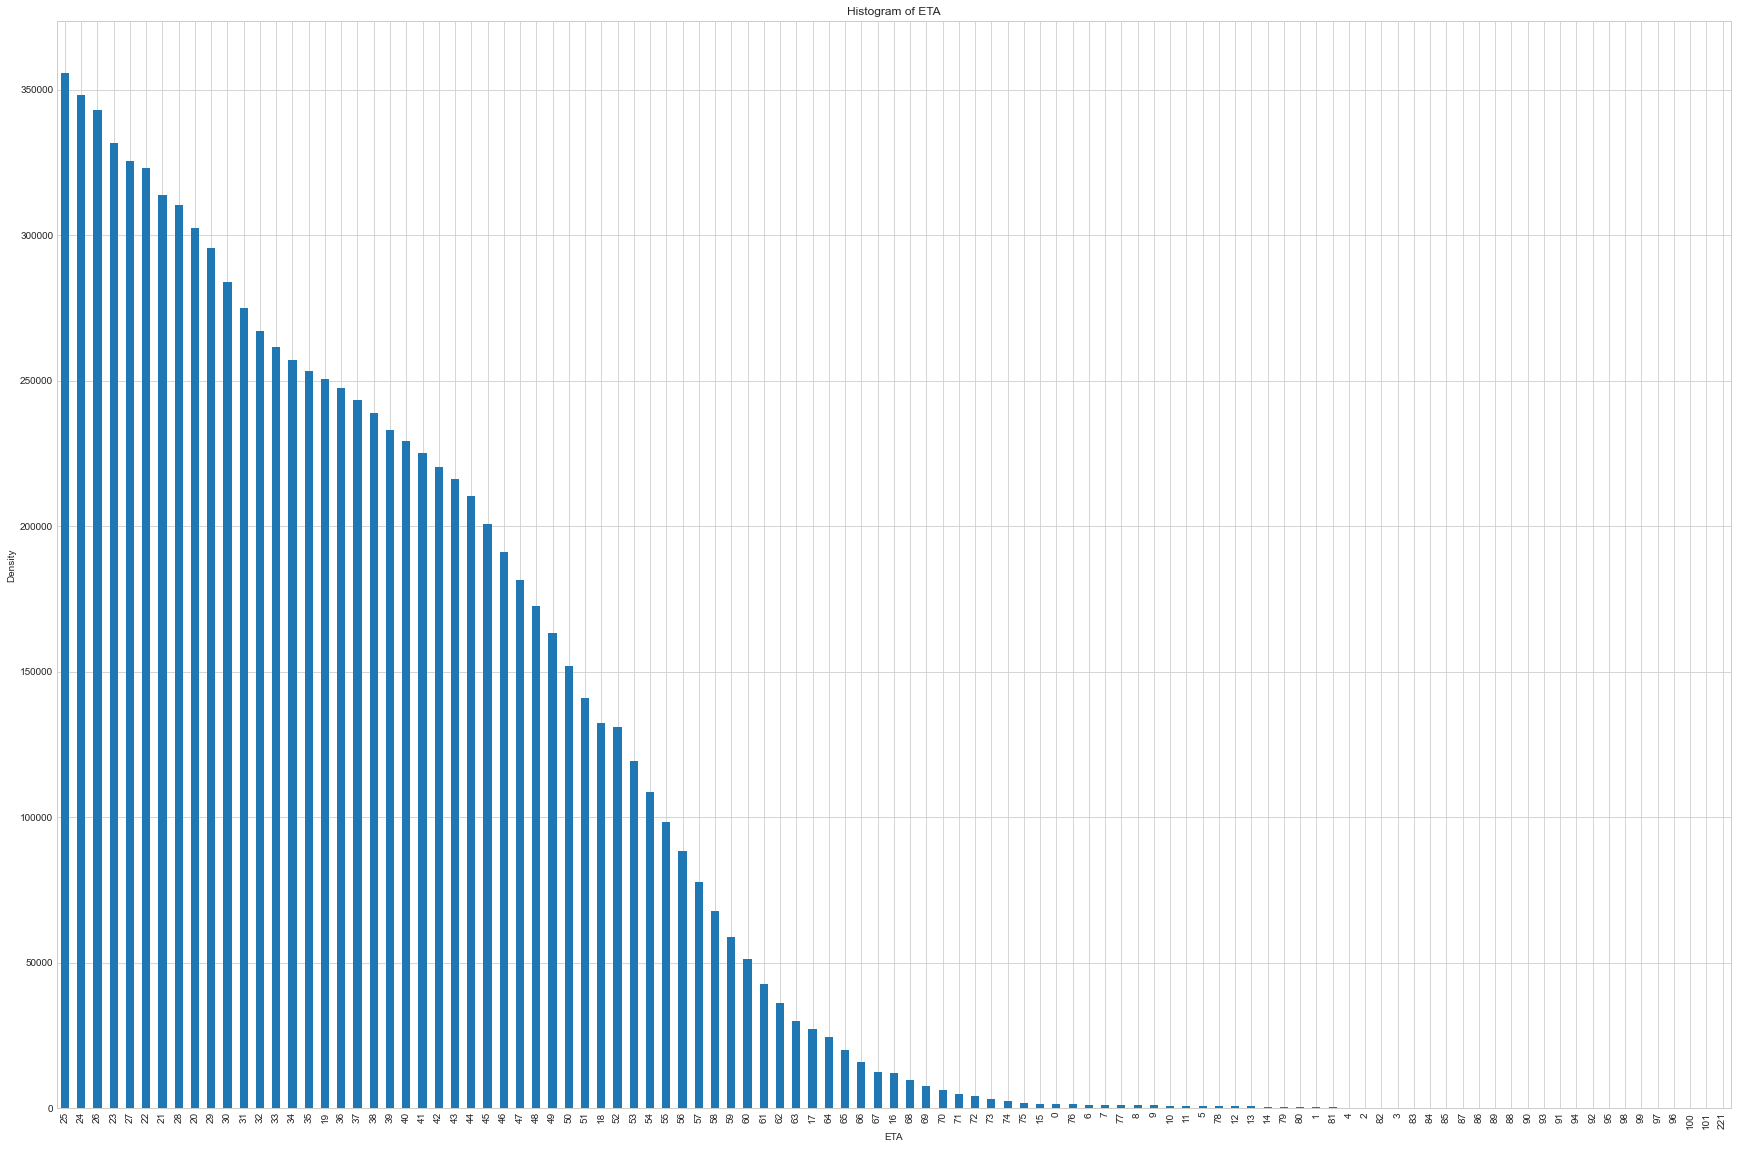

In [6]:
df_Rapporti_Attivati['ETA'].value_counts().plot(kind='bar', figsize=(30, 20))
plt.title('Histogram of ETA')
plt.xlabel('ETA')
plt.ylabel('Density')

3. __Distribution of 'GENERE'__

Text(0.5, 1.0, 'Distribution for GENERE')

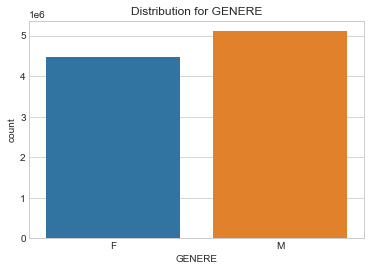

In [7]:
sns.countplot(x='GENERE', data=df_Rapporti_Attivati)
plt.title('Distribution for GENERE')

4. __Pie chart 'PROVINCIAIMPRESA'__

MILANO             4765803
BRESCIA            1167053
BERGAMO             806702
VARESE              548804
MONZA E BRIANZA     487469
COMO                381673
MANTOVA             357928
PAVIA               319569
CREMONA             241723
LECCO               203317
SONDRIO             161758
LODI                137995
Name: PROVINCIAIMPRESA, dtype: int64


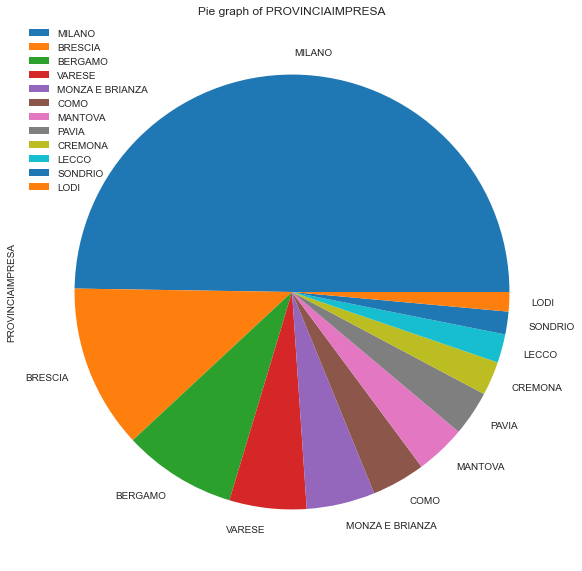

In [8]:
df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts().plot(kind='pie', figsize=(10, 10))
plt.title('Pie graph of PROVINCIAIMPRESA')
plt.legend(loc=2)

print(df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts())

5. __Distribution of Job for gender for each city__

Text(0.5, 1.0, 'Percentage of distribution in cities by gender')

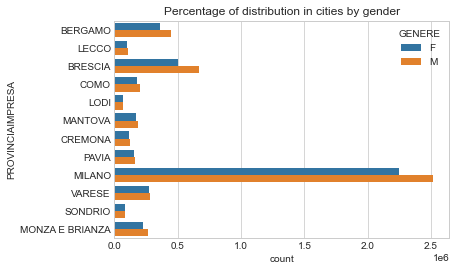

In [9]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=df_Rapporti_Attivati)
plt.title('Percentage of distribution in cities by gender')

___

### __Data cleaning and preparing__

The initial analysis show an  ambiguities in the data (e.g. zero years old people, NAN values, ...).

In this session we will clean the dataSet through:

1. __Elimination of people with wrong age.__
2. __Elimination of all null values.__

1. __Elimination of people with wrong age.__

In this analysis we will take a range of age between 18 and 69

In [10]:
dropAge = df_Rapporti_Attivati[(df_Rapporti_Attivati['ETA'] >= 70) | (df_Rapporti_Attivati['ETA'] <= 17)].index

In [11]:
df_Rapporti_Attivati.drop(dropAge, inplace=True)

2. __Elimination of all null values.__

In [12]:
col = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in col:
    df_Rapporti_Attivati.loc[df_Rapporti_Attivati[column] == '?', column] = np.nan

df_Rapporti_Attivati.dropna(axis = 0, inplace = True) 

___

### __Data analysis before and during Covid19__

After the previous analysis of the dataset, we will fill out the distribution of:
1. __Global business contract.__
2. __Before-Covid business contract.__
3. __During-Covid business contract.__

NOTE: during the analysis of the business contract distribution, we will consider the same range of time

In [13]:
data=df_Rapporti_Attivati['DATA']

In [14]:
year=[]
mounth=[]
day=[]
data_Complete=[]
for i in data:
    data1=datetime.strptime(i, "%d/%m/%Y")
    year.append(data1.year)
    mounth.append(data1.month)
    day.append(data1.day)
    data_Complete.append(data1)

In [15]:
df_Rapporti_Attivati.drop(['DATA'], axis=1, inplace=True)

In [16]:
df_Rapporti_Attivati['DATA'] = data_Complete
df_Rapporti_Attivati['YEAR'] = year
df_Rapporti_Attivati['MOUNTH'] = mounth
df_Rapporti_Attivati['DAY'] = day

In [17]:
df_Rapporti_Attivati.head(5)

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MOUNTH,DAY
0,F,60.0,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020-05-09,2020,5,9
1,M,43.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019-07-12,2019,7,12
2,F,20.0,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2013-06-05,2013,6,5
3,F,28.0,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,2010-03-12,2010,3,12
4,F,49.0,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,2021-04-06,2021,4,6


___

1. __Global Data Analysis__

In [18]:
global_Data_YEAR = df_Rapporti_Attivati.groupby(['YEAR']).MOUNTH.count()

In [19]:
global_Data_MOUNTH = df_Rapporti_Attivati.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

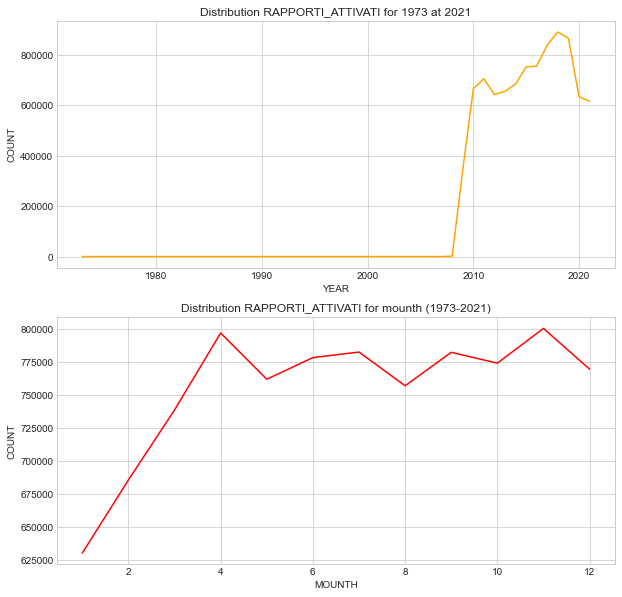

In [20]:
## crete a different subplot for two dataAnalysis
figure = plt.figure(figsize=(10, 10))

x_dataY = global_Data_YEAR.index
y_dataY = global_Data_YEAR.values

x_dataM = global_Data_MOUNTH.index
y_dataM = global_Data_MOUNTH.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY, y_dataY, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM, y_dataM, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth (1973-2021)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [21]:
data_global_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'M')]
data_global_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'F')]

In [22]:
global_Data_YEAR_M = data_global_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_F = data_global_F.groupby(['MOUNTH']).GENERE.count()

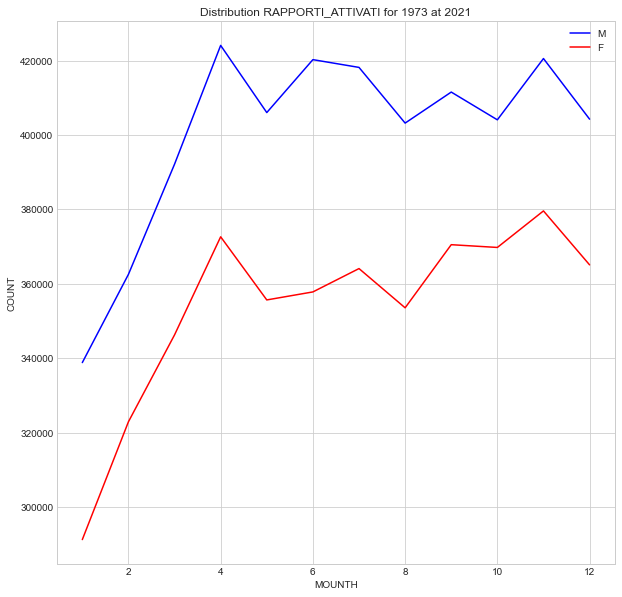

In [23]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_M = global_Data_YEAR_M.index
y_dataY_M = global_Data_YEAR_M.values

x_dataY_F = global_Data_YEAR_F.index
y_dataY_F = global_Data_YEAR_F.values


ax.plot(x_dataY_M, y_dataY_M, color='blue', label='M')
ax.plot(x_dataY_F, y_dataY_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()

2. __Data Analysis Before covid__

In [24]:
data_Before_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019)]

In [25]:
global_Data_YEAR_Before_Covid = data_Before_Covid.groupby(['YEAR']).MOUNTH.count()

In [26]:
global_Data_MOUNTH_Before_Covid = data_Before_Covid.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

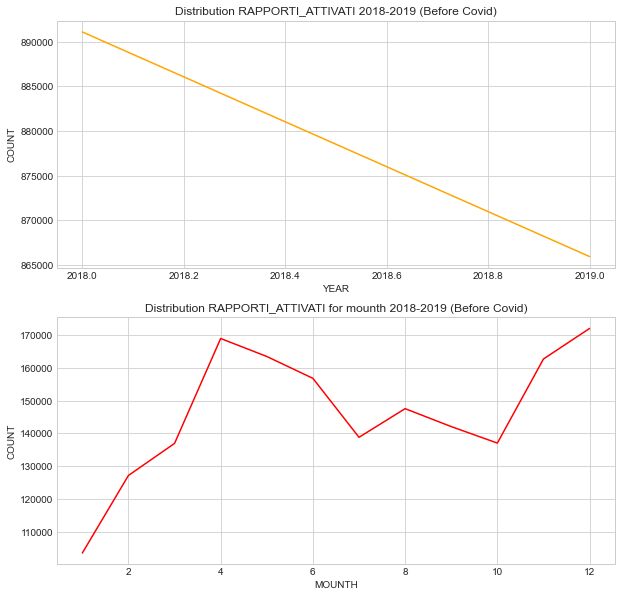

In [27]:
figure = plt.figure(figsize=(10, 10))

x_dataY_BC = global_Data_YEAR_Before_Covid.index
y_dataY_BC = global_Data_YEAR_Before_Covid.values

x_dataM_BC = global_Data_MOUNTH_Before_Covid.index
y_dataM_BC = global_Data_MOUNTH_Before_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_BC, y_dataY_BC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_BC, y_dataM_BC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth 2018-2019 (Before Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [28]:
data_Before_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]

data_Before_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [29]:
global_Data_YEAR_before_Covid_M = data_Before_Covid_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_before_Covid_F = data_Before_Covid_F.groupby(['MOUNTH']).GENERE.count()

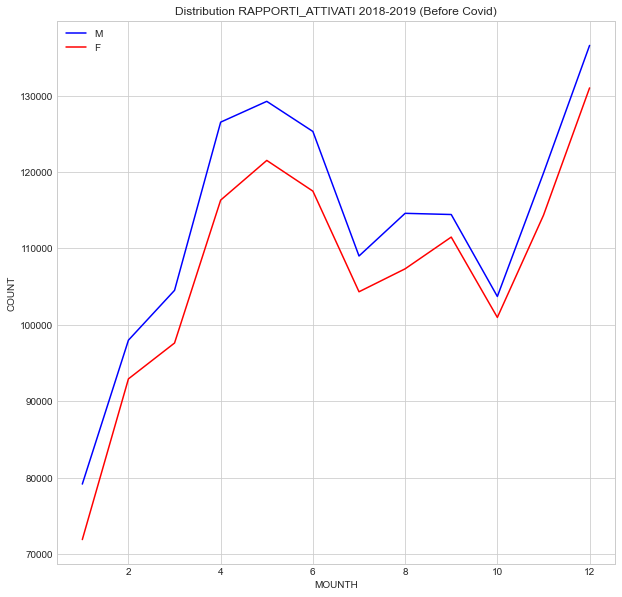

In [30]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_BC_M = global_Data_YEAR_before_Covid_M.index
y_dataY_BC_M = global_Data_YEAR_before_Covid_M.values

x_dataY_BC_F = global_Data_YEAR_before_Covid_F.index
y_dataY_BC_F = global_Data_YEAR_before_Covid_F.values


ax.plot(x_dataY_BC_M, y_dataY_BC_M, color='blue', label='M')
ax.plot(x_dataY_BC_F, y_dataY_BC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()

3. __Data Analysis during covid__

In [31]:
data_during_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019)]

In [32]:
global_Data_YEAR_during_Covid = data_during_Covid.groupby(['YEAR']).MOUNTH.count()

In [33]:
global_Data_MOUNTH_during_Covid = data_during_Covid.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

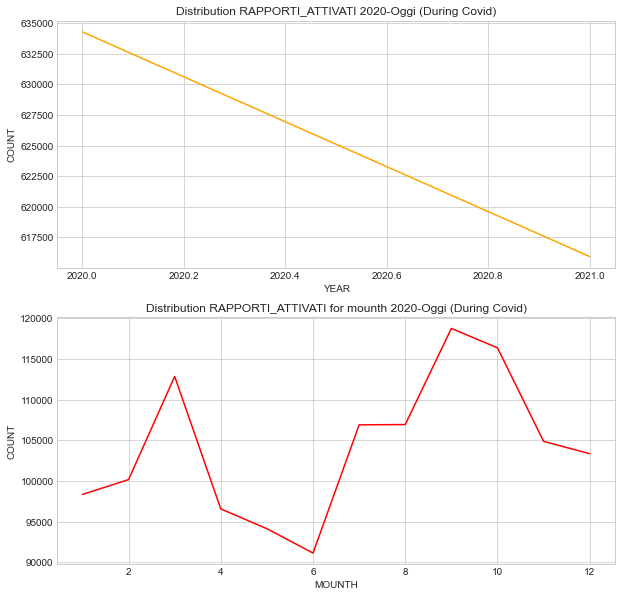

In [34]:
figure = plt.figure(figsize=(10, 10))

x_dataY_DC = global_Data_YEAR_during_Covid.index
y_dataY_DC = global_Data_YEAR_during_Covid.values

x_dataM_DC = global_Data_MOUNTH_during_Covid.index
y_dataM_DC = global_Data_MOUNTH_during_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_DC, y_dataY_DC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_DC, y_dataM_DC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth 2020-Oggi (During Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [35]:
data_during_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]
data_during_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [36]:
global_Data_YEAR_during_Covid_M = data_during_Covid_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_during_Covid_F = data_during_Covid_F.groupby(['MOUNTH']).GENERE.count()

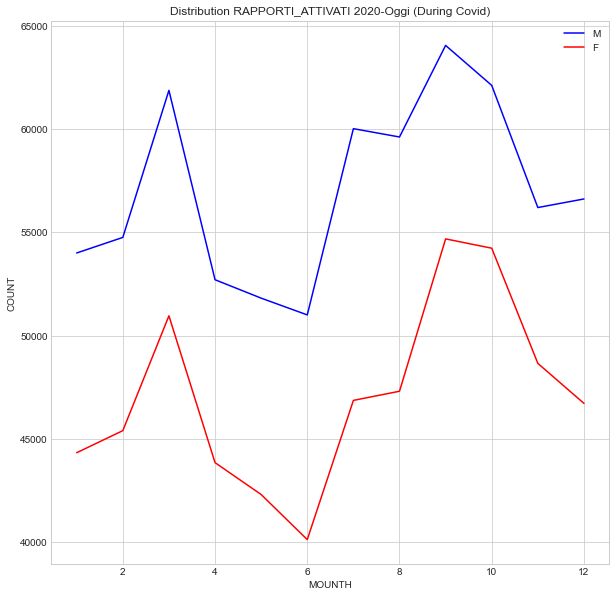

In [37]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_DC_M = global_Data_YEAR_during_Covid_M.index
y_dataY_DC_M = global_Data_YEAR_during_Covid_M.values

x_dataY_DC_F = global_Data_YEAR_during_Covid_F.index
y_dataY_DC_F = global_Data_YEAR_during_Covid_F.values


ax.plot(x_dataY_DC_M, y_dataY_DC_M, color='blue', label='M')
ax.plot(x_dataY_DC_F, y_dataY_DC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()


______

## __Time Series analysis__

Previously, we have analyzed 'Rapporti_di_lavoro_Attivati' dataSet in terms of:
- __Globally__
- __Before Covid 19 pandemic__
- __During Covid 19 pandemic__

In the following paragraphs, we are going to view the trend of these time series. This analysis want to outlines:
1. __Global Analysis__
2. __Analysis during coviid 19 pandemic__

In particular:
1. __View of boxPlot of month-wise(seasonal) ans year-wise(Trend)__
2. __View of Additive and Multiplicative Patterns__
3. __Stationarity test__
4. __Time Series detrend__
5. __Deseasonalize__
6. __Time Series forecasting__

In [38]:
def test_stationarity(timeseries):
    """
    Check Stationariety of time series.
    Please use np.array or pd.series as Input with your TS data only
    """
    #Convert numpy array to pandas serie
    if type(timeseries) is np.ndarray:
        df_timeseries = pd.Series(timeseries) 
        
    try:
        #Determing rolling statistics
        rolmean = df_timeseries.rolling(window=12).mean()
        rolstd = df_timeseries.rolling(window=12).std()

        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)

        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')

        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        
        # print(dfoutput)
    
        return dftest, dfoutput
    except Exception as message:
        print(f"Impossible to calc the stationariery of your TS: {message}")
        return None, None

In [39]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [40]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

## 1. Global  Analysis

This chapter describes the Time Series of the global dataset analyzed before. In particular we have created two new subset between 2009 and 2021 year in order to clean the Time Series from null data.

In [41]:
global_Data_YEAR = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR']>2008)]
global_Data_YEAR_1 = global_Data_YEAR.groupby(['DATA']).YEAR.count()
global_Data_YEAR_2 = global_Data_YEAR.groupby(['YEAR']).MOUNTH.count()

global_Data_YEAR_1 = pd.DataFrame({'date': global_Data_YEAR_1.index,
                                 'value': global_Data_YEAR_1.values})

global_Data_YEAR_2 = pd.DataFrame({'date': global_Data_YEAR_2.index,
                                 'value': global_Data_YEAR_2.values})

global_Data_YEAR_1['year'] = [d.year for d in global_Data_YEAR_1.date]
global_Data_YEAR_1['month'] = [d.strftime('%b') for d in global_Data_YEAR_1.date]
years = global_Data_YEAR_1['year'].unique()


1.1. __BoxPlot of Month-wise(Seasonal) and Year-wise(trend)__

We have group the data at seasonal intervals in order to see how the values are distributed in year and month and how it compares over time.

- The first box plot represent the trend over the years --> Trend
- The second box plot represent the  trend in the various month for all years --> Seasonality

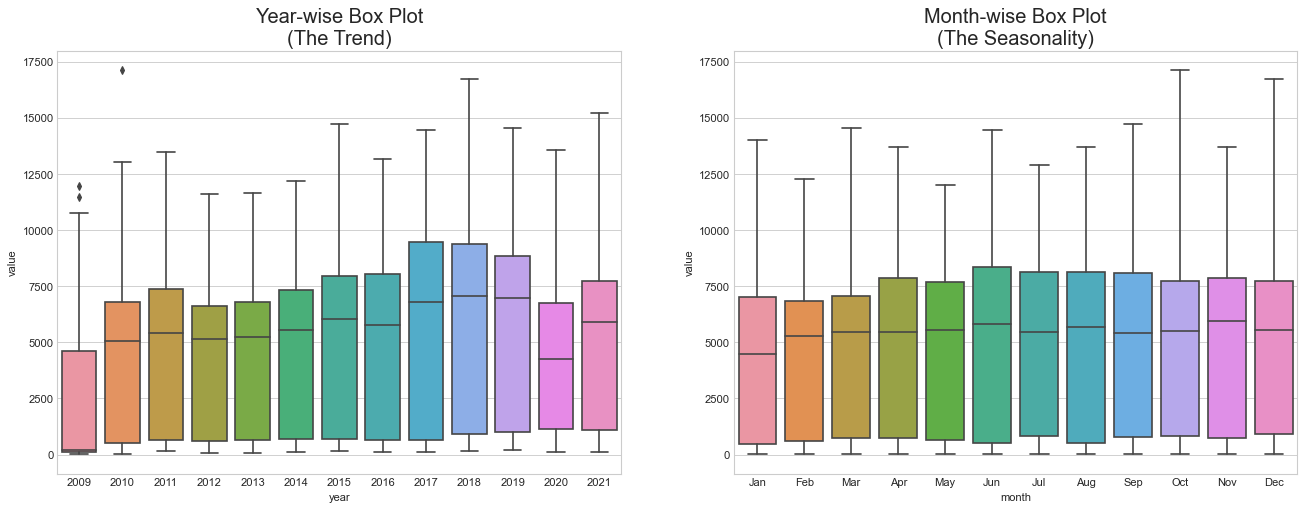

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=global_Data_YEAR_1, ax=axes[0])
sns.boxplot(x='month', y='value', data=global_Data_YEAR_1, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

1.2. __Additive and moltiplicative patterns__

Depending on the nature of the trend and seasonality, this time series has been modeled as an additive and multiplicative.

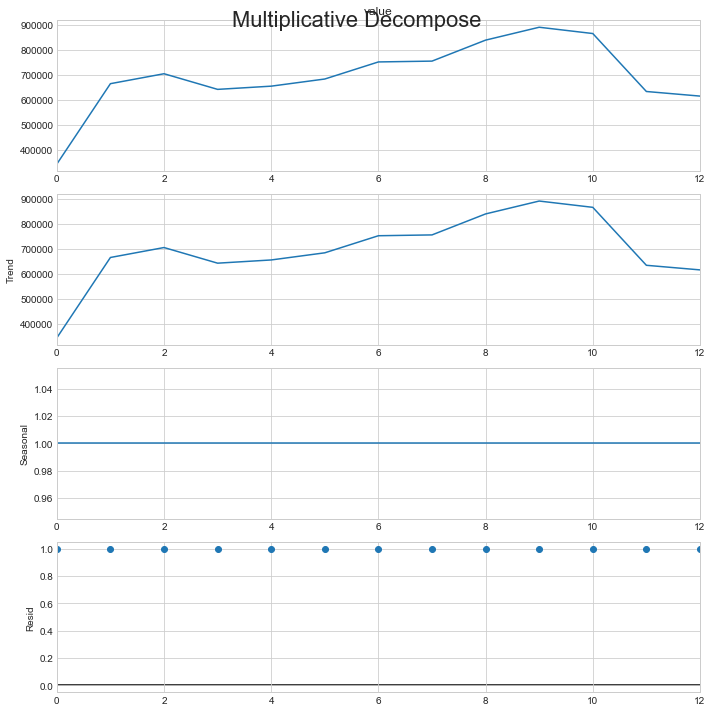

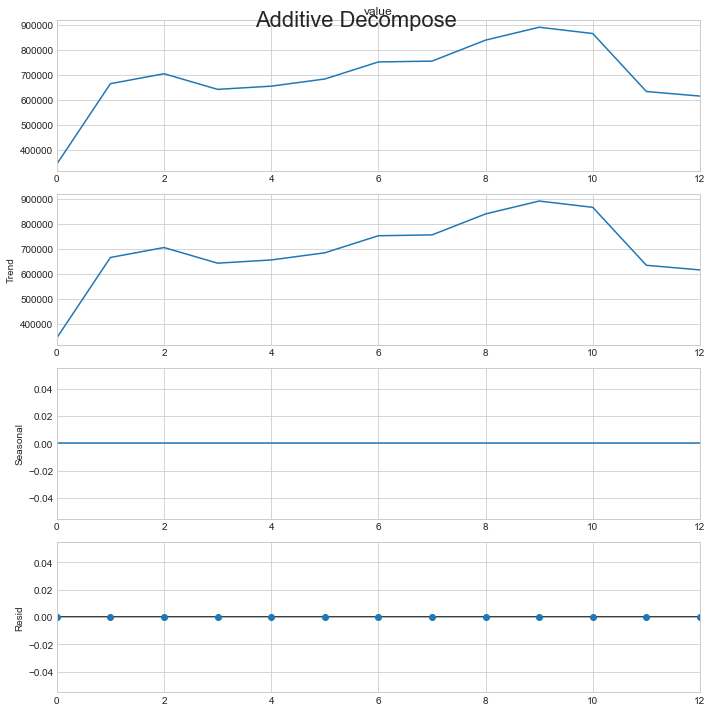

In [43]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(x=global_Data_YEAR_2['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Additive Decomposition
result_add = seasonal_decompose(x=global_Data_YEAR_2['value'], model='additive', extrapolate_trend='freq', period=1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

1.3. __Stationarity test__

This analysis want to test if our Time Series has constant statistical properties over time. 

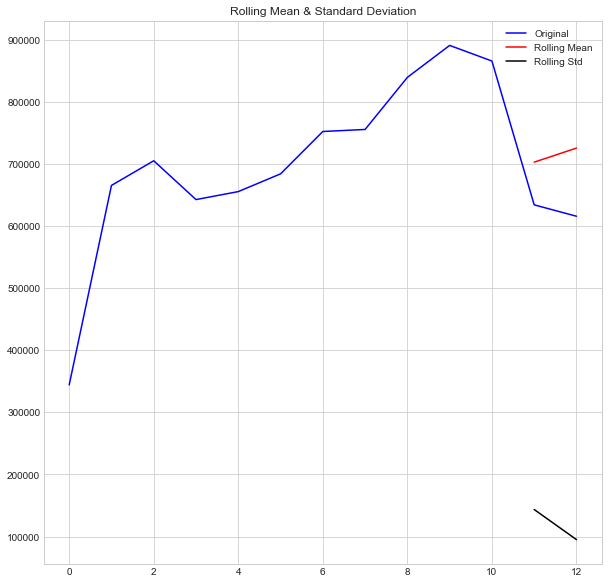

Results of Dickey-Fuller Test:


Test Statistic                 -1.471985
p-value                         0.547322
#Lags Used                      1.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

In [44]:
dftest, dfoutput = test_stationarity(global_Data_YEAR_2['value'].values)
dfoutput

1.4. __Time Series Detrend__

We have detrend our time series in order to remove the trend component from it. 

We have used two method:
- Subtract the line of best fit from the time series mean.
- Subtract the line of the best from the trend component obtained from time series decomposition we saw earlier.

N.B. we obtained the line of the best fit from the time series through a linear regression model.

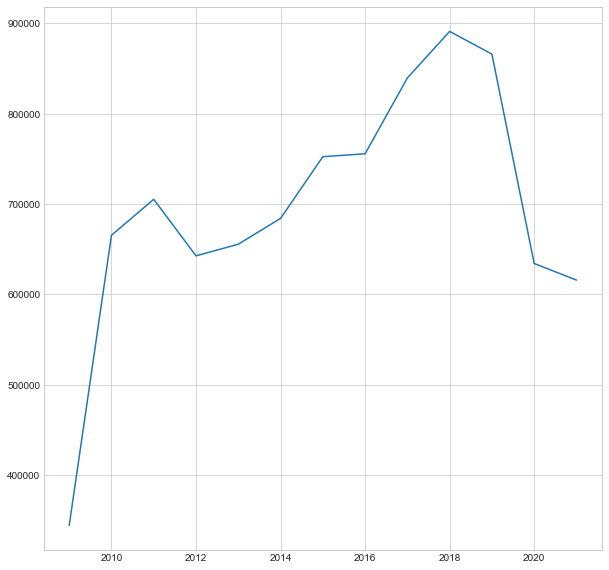

In [45]:
#This is our TS
df_detrend = global_Data_YEAR_2.copy()
df_detrend.index = df_detrend.date
df_detrend = df_detrend.drop('date',axis=1)
plt.plot(df_detrend.index, df_detrend.value)

Text(0.5, 1.0, 'Attivate contract detrended by subtracting the least squares fit')

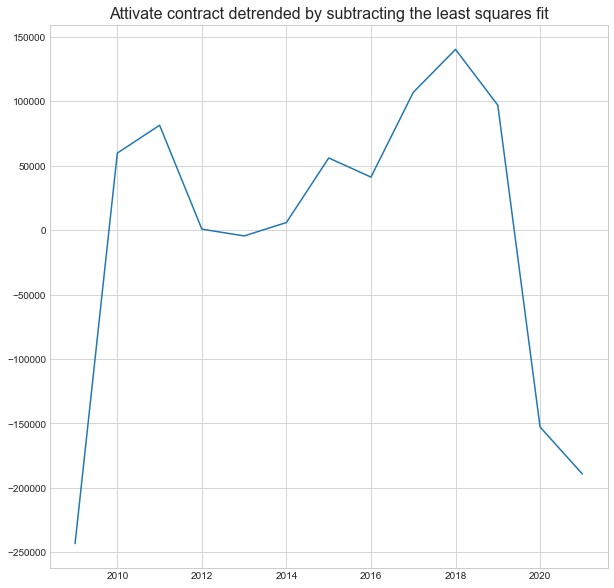

In [46]:
# Using scipy: Subtract the line of best fit
detrended = signal.detrend(df_detrend.value.values)
plt.plot(df_detrend.index, detrended)
plt.title('Attivate contract detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Attivate contract detrended by subtracting the trend component (multiplicative)')

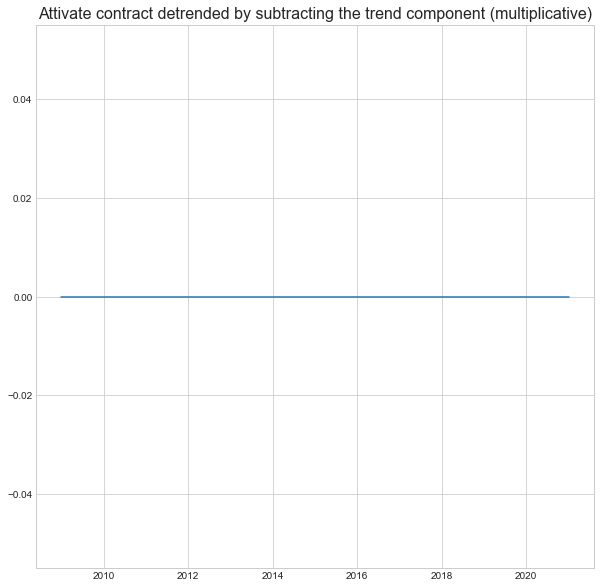

In [47]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(x=df_detrend['value'], model='multiplicative', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('Attivate contract detrended by subtracting the trend component (multiplicative)', fontsize=16)

Text(0.5, 1.0, 'Activate contract detrended by subtracting the trend component (additive)')

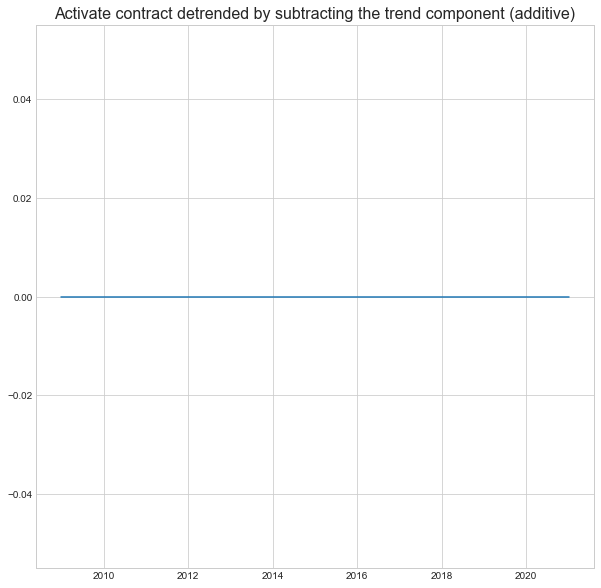

In [48]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(df_detrend['value'], model='additive', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('Activate contract detrended by subtracting the trend component (additive)', fontsize=16)

1.5. __Deseasonalized__

This pharagraph describes the seasonal difference of the series by subtracting the value of previous season from the current value.

[]

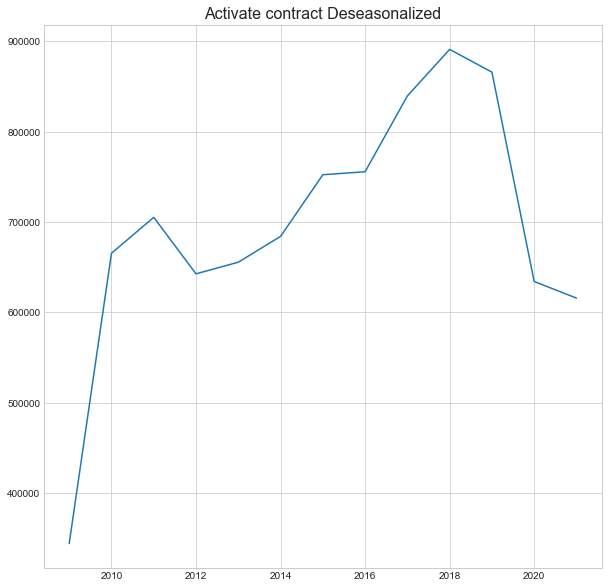

In [49]:
# Subtracting the Trend Component.
df_deseason = df_detrend.copy()

# Time Series Decomposition
result_mul = seasonal_decompose(df_deseason['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Deseasonalize
deseasonalized = df_deseason.value.values / result_mul.seasonal

# Plot
plt.plot(df_deseason.index, deseasonalized)
plt.title('Activate contract Deseasonalized', fontsize=16)
plt.plot()

1.6. __Time Series Forecasting__

We have used the approximate entropy in order to quantify the regularity and unpredictability of fluctuations in our time series (The higher the approximate entropy, the more difficult it is to forecast it).

But we have also used the sample entropy because it is more consistent in estimating the complexity even for smaller time series.

In [50]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset attivate: {ApEn(global_Data_YEAR_2.value, m=2, r=0.2*np.std(global_Data_YEAR_2.value))}')     # 0.651
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

Dataset attivate: 0.028513153103694844
0.15145058590199456
0.7728244552354244


In [51]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset Attivate: {SampEn(global_Data_YEAR_2.value, m=2, r=0.2*np.std(global_Data_YEAR_2.value))}')      # 0.78
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

Dataset Attivate: inf
2.5649493574615367


C:\Users\DANIELE\AppData\Local\Temp/ipykernel_3756/1392444303.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


2.412933150162911


______

# 2. Analysis during covid 19 pandemic

This chapter describes the Time Series of the 'During covid 19 pandemic' part analyzed before. In particular we have created two new subset between 2020 and 2021 year in order to clean the Time Series from null data.

In [52]:
global_Data_During_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR']>2019)]
global_Data_During_Covid = global_Data_During_Covid.groupby(['DATA']).YEAR.count()

global_Data_During_Covid = pd.DataFrame({'date': global_Data_During_Covid.index,
                                         'value': global_Data_During_Covid.values})

global_Data_During_Covid['year'] = [d.year for d in global_Data_During_Covid.date]
global_Data_During_Covid['month'] = [d.strftime('%b') for d in global_Data_During_Covid.date]
years = global_Data_During_Covid['year'].unique()

2.1. __BoxPlot of Mounth-wise(Seasonal) and Year-wise(trend)__

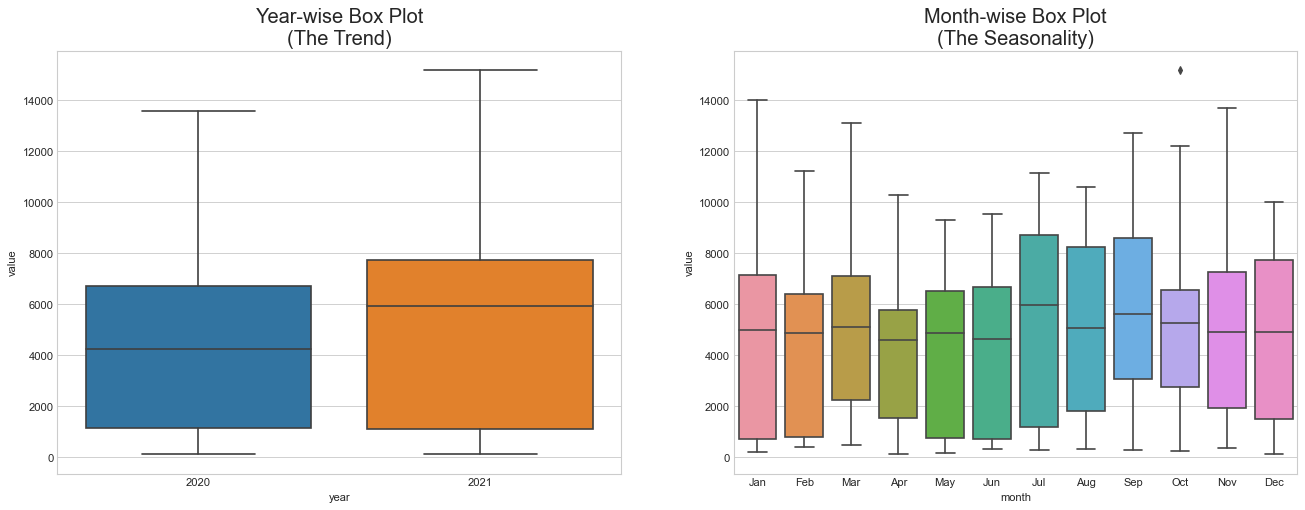

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=global_Data_During_Covid, ax=axes[0])
sns.boxplot(x='month', y='value', data=global_Data_During_Covid, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

2.2. __Additive and moltiplicative patterns__

In [54]:
df_Mol_Add = global_Data_During_Covid.copy()
df_Mol_Add.index = df_Mol_Add['date']
df_Mol_Add= df_Mol_Add.drop(['date','year','month'],axis=1)

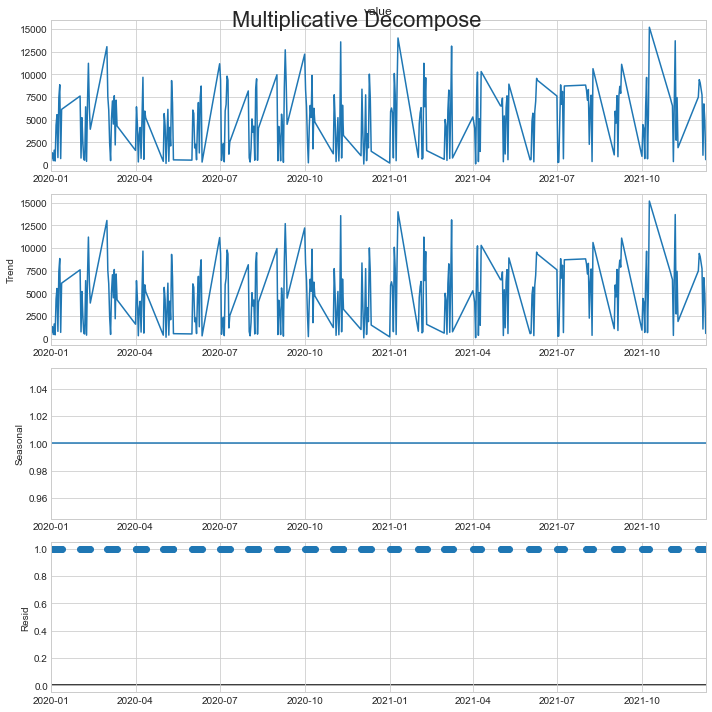

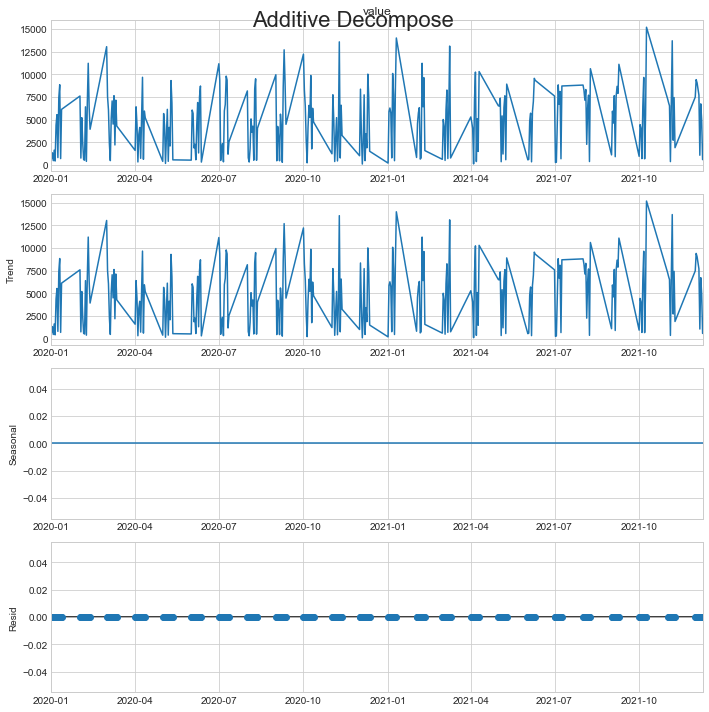

In [55]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(x=df_Mol_Add['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Additive Decomposition
result_add = seasonal_decompose(x=df_Mol_Add['value'], model='additive', extrapolate_trend='freq', period=1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

2.3. __Stationarity Test__

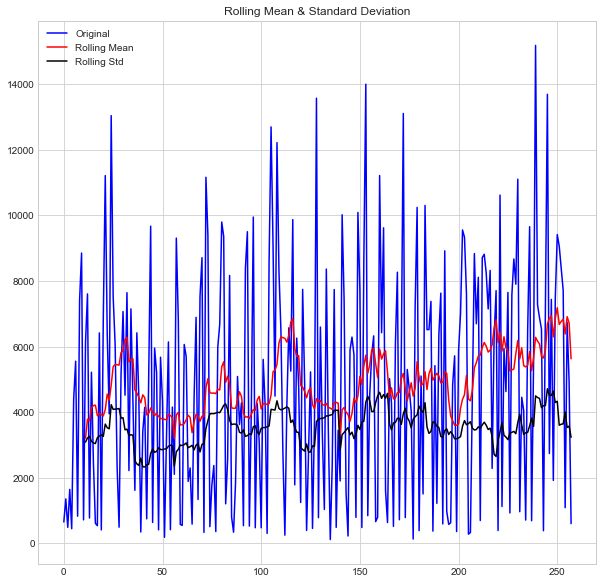

Results of Dickey-Fuller Test:


Test Statistic                  -3.374954
p-value                          0.011843
#Lags Used                      11.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64

In [56]:
dftest, dfoutput = test_stationarity(df_Mol_Add['value'].values)
dfoutput

2.4. __Time Series Detrend__

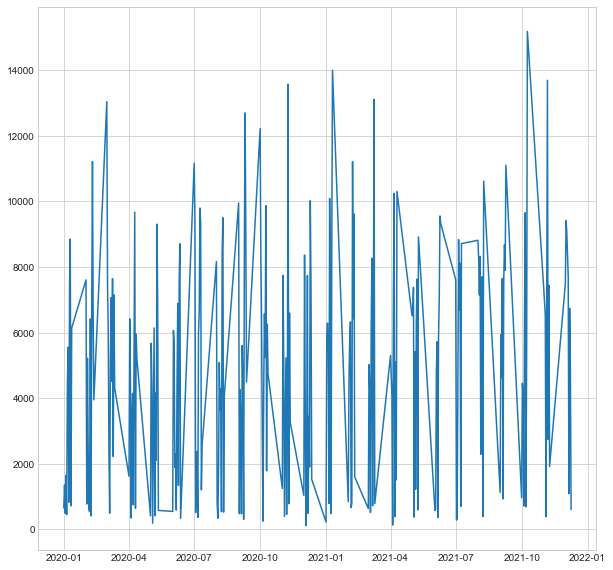

In [57]:
df_detrend = global_Data_During_Covid.copy()
df_detrend.index = df_detrend.date
df_detrend = df_detrend.drop('date',axis=1)
plt.plot(df_detrend.index, df_detrend.value)

Text(0.5, 1.0, 'Activate contract detrended by subtracting the least squares fit')

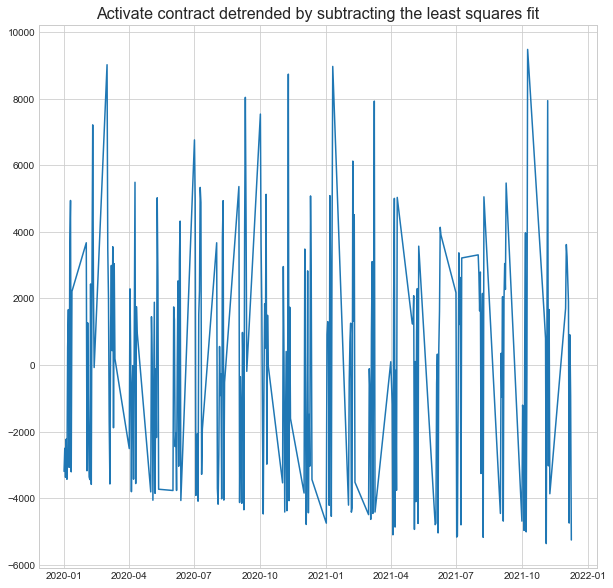

In [58]:
# Using scipy: Subtract the line of best fit
detrended = signal.detrend(df_detrend.value.values)
plt.plot(df_detrend.index, detrended)
plt.title('Activate contract detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Activate componant detrended by subtracting the trend component (multiplicative)')

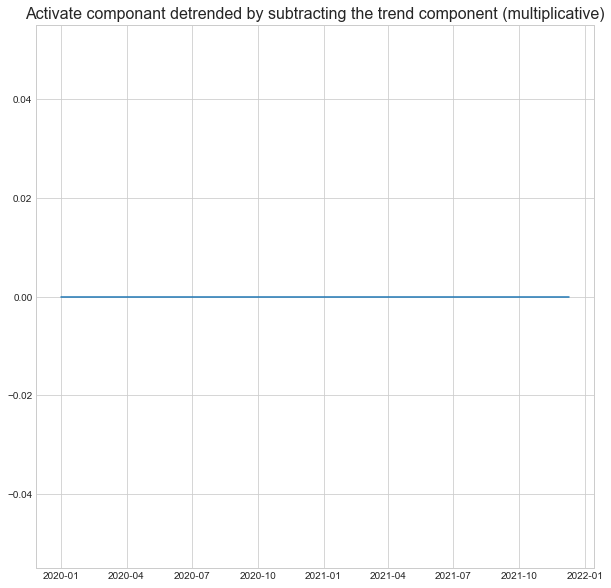

In [59]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(x=df_detrend['value'], model='multiplicative', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('Activate componant detrended by subtracting the trend component (multiplicative)', fontsize=16)

Text(0.5, 1.0, 'activate contract detrended by subtracting the trend component (additive)')

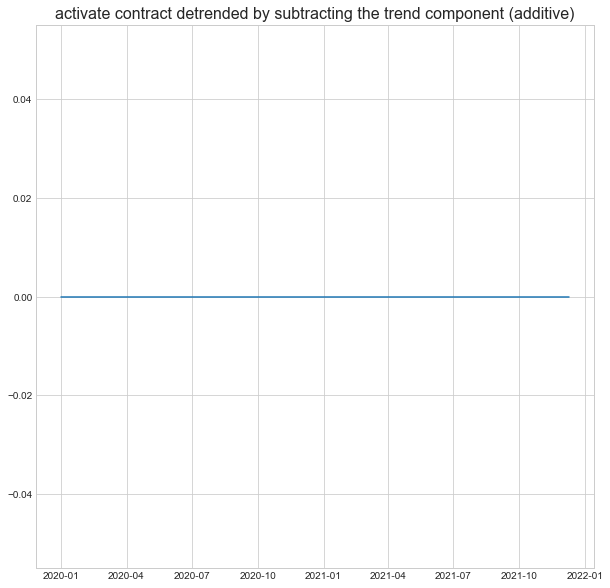

In [60]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(df_detrend['value'], model='additive', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('activate contract detrended by subtracting the trend component (additive)', fontsize=16)

2.5. __Deseasonalize__

[]

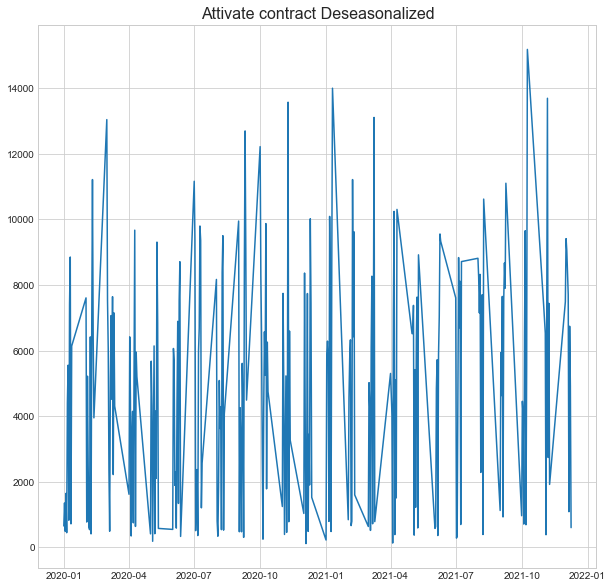

In [61]:
# Subtracting the Trend Component.
df_deseason = df_detrend.copy()

# Time Series Decomposition
result_mul = seasonal_decompose(df_deseason['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Deseasonalize
deseasonalized = df_deseason.value.values / result_mul.seasonal

# Plot
plt.plot(df_deseason.index, deseasonalized)
plt.title('Attivate contract Deseasonalized', fontsize=16)
plt.plot()

2.6. __Time Series forecasting__

In [62]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset attivate: {ApEn(global_Data_During_Covid.value, m=2, r=0.2*np.std(global_Data_During_Covid.value))}')     # 0.651
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

Dataset attivate: 1.168228758255684
0.334899009124606
0.8110239128491119


In [63]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset attivate: {SampEn(global_Data_During_Covid.value, m=2, r=0.2*np.std(global_Data_During_Covid.value))}')      # 0.78
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

Dataset attivate: 1.9389511787310099
inf


C:\Users\DANIELE\AppData\Local\Temp/ipykernel_3756/1392444303.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


2.803360380906535


______

### __Feature Engineering__

After manipulating data, cleaning null/ambiguous data and having a view of time series behaviour, now we are going to manipulated data in order to transform and adapt them to create the automatic learning model.   

This process is called Feature Engineering; it is important for the Machine Learning because some type of automatic learning don't support  token/String data but only number

Our goal is to identify in the dataSet the token/String data in order to transform them in to number type.

In [64]:
result_String = df_Rapporti_Attivati.select_dtypes(include=['object', 'category'])

In [65]:
result_String.head(5)

,GENERE,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,F,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,M,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,F,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,F,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,F,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


### __Label encoder__

We used LabelEncoder to convert each class under specified feature to a numerical value.

In [66]:
df_copy = df_Rapporti_Attivati.copy()

In [67]:
class_Genere = preprocessing.LabelEncoder()
class_Genere.fit(df_copy['GENERE'])
df_copy['GENERE'] = class_Genere.transform(df_copy['GENERE'])

class_SettoreEconomico = preprocessing.LabelEncoder()
class_SettoreEconomico.fit(df_copy['SETTOREECONOMICODETTAGLIO'])
df_copy['SETTOREECONOMICODETTAGLIO'] = class_SettoreEconomico.transform(df_copy['SETTOREECONOMICODETTAGLIO'])

class_TitoloStudio = preprocessing.LabelEncoder()
class_TitoloStudio.fit(df_copy['TITOLOSTUDIO'])
df_copy['TITOLOSTUDIO'] = class_TitoloStudio.transform(df_copy['TITOLOSTUDIO'])

class_Contratto = preprocessing.LabelEncoder()
class_Contratto.fit(df_copy['CONTRATTO'])
df_copy['CONTRATTO'] = class_Contratto.transform(df_copy['CONTRATTO'])

class_ModalitaLavoro = preprocessing.LabelEncoder()
class_ModalitaLavoro.fit(df_copy['MODALITALAVORO'])
df_copy['MODALITALAVORO'] = class_ModalitaLavoro.transform(df_copy['MODALITALAVORO'])

class_Provincia = preprocessing.LabelEncoder()
class_Provincia.fit(df_copy['PROVINCIAIMPRESA'])
df_copy['PROVINCIAIMPRESA'] = class_Provincia.transform(df_copy['PROVINCIAIMPRESA'])

class_Italiano = preprocessing.LabelEncoder()
class_Italiano.fit(df_copy['ITALIANO'])
df_copy['ITALIANO'] = class_Italiano.transform(df_copy['ITALIANO'])

df_copy.head(5)

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MOUNTH,DAY
0,0,60.0,188,8,31,4,0,188,2020-05-09,2020,5,9
1,1,43.0,830,6,24,4,0,89,2019-07-12,2019,7,12
2,0,20.0,542,6,7,4,0,89,2013-06-05,2013,6,5
3,0,28.0,62,0,39,0,0,89,2010-03-12,2010,3,12
4,0,49.0,1073,6,37,0,0,89,2021-04-06,2021,4,6


In [68]:
df_copy.dtypes

GENERE                                int32
ETA                                 float64
SETTOREECONOMICODETTAGLIO             int32
TITOLOSTUDIO                          int32
CONTRATTO                             int32
MODALITALAVORO                        int32
PROVINCIAIMPRESA                      int32
ITALIANO                              int32
DATA                         datetime64[ns]
YEAR                                  int64
MOUNTH                                int64
DAY                                   int64
dtype: object

### __Data Reduction__

After the previous analysis, we are going to  reduce our data because the effectivenes of most of learning algoritm comes from the discrimminatory and particular data.

#### __Linearity and not-Linearity dataset__

This paragraph want to find out if our dataSet is linear or not. 

We used the Square Error Method:
- If the square error will be high the dataset will not be linear
- If the square error will be lower and close to the zero this will be linear

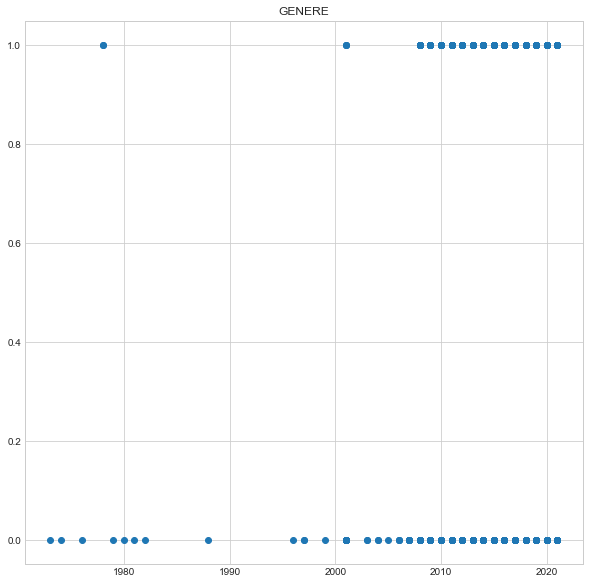

-945.0651937147895


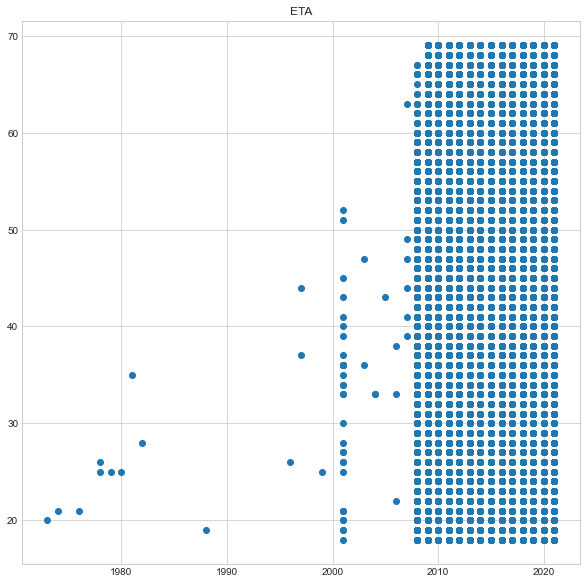

-891.3604645131851


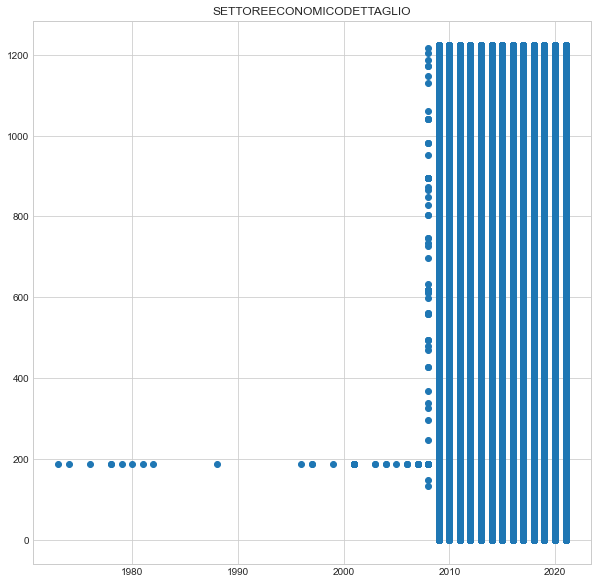

-273.7387482668863


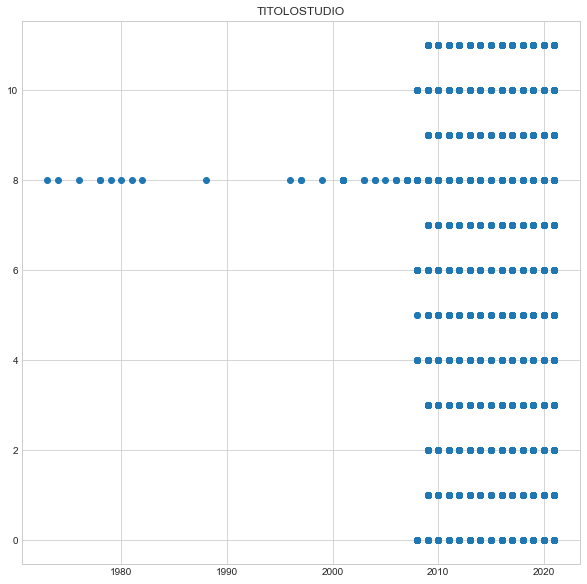

-369.29127534353523


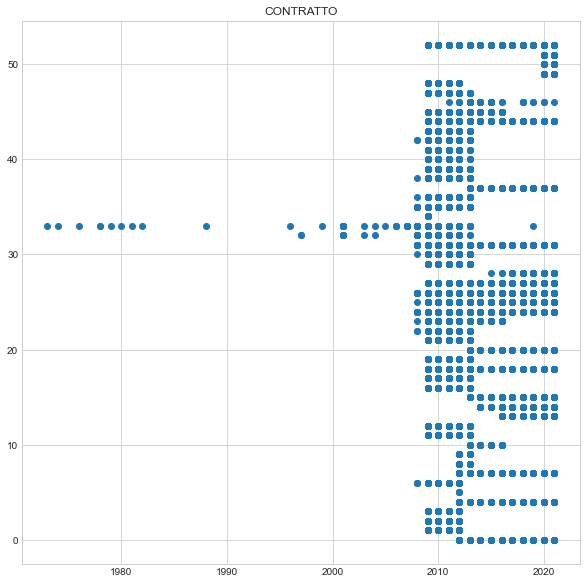

-39.97067531582572


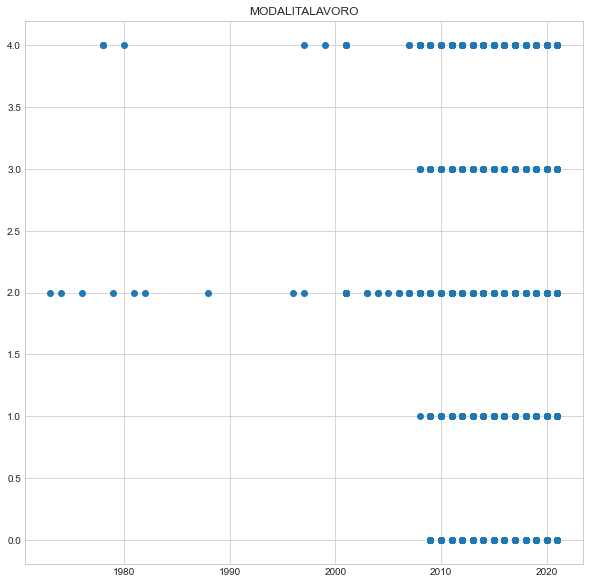

-2405.8953325121647


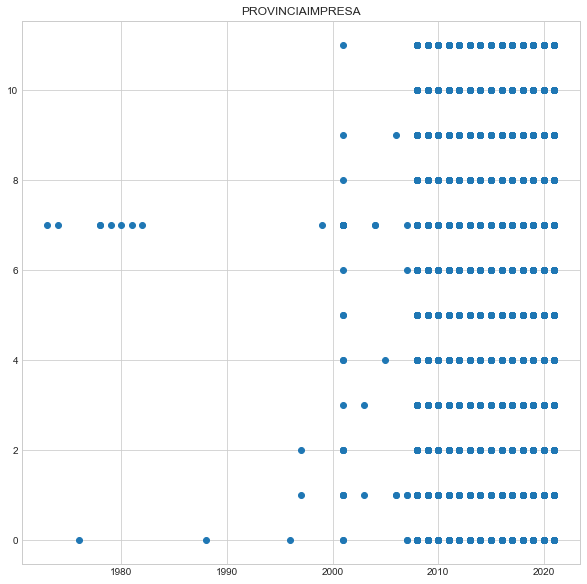

-240673.34654076525


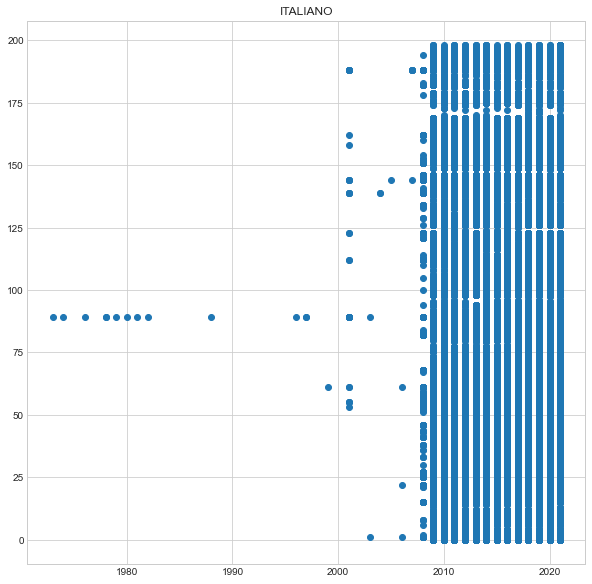

-36664.633327671334


In [69]:
def linearity(df, list_column):
    for i in list_column:
        X = df_copy['YEAR']
        Y = df[i]
        plt.scatter(X,Y)
        plt.title(i)
        plt.show()
        
        regressor_linear = LinearRegression().fit(X.array.reshape(-1, 1) ,Y)
        print(r2_score(regressor_linear.predict(X.array.reshape(-1, 1) ),Y))

list_1 = ['GENERE', 'ETA','SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 'MODALITALAVORO',
          'PROVINCIAIMPRESA', 'ITALIANO']

linearity(df_copy, list_1)